In [1]:
!pip install xarray netCDF4
!pip install hvplot

In [2]:
import os
import re
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import hvplot.dask  # noqa
import dask
from scipy import stats

In [3]:
tmpsf_file = 'axial_tmpsf4.csv'
df_tmpsf = pd.read_csv(tmpsf_file, dtype=object)

print(df_tmpsf.columns.tolist())

['time', 't01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24']


In [4]:
tmpsf_file = 'axial_tmpsf4.csv' #pull in file with data
df_tmpsf = pd.read_csv(tmpsf_file, dtype=object) #read the csv with panda and name it
df_tmpsf.index = pd.to_datetime(df_tmpsf['time'].values)
df_tmpsf["t01"] = pd.to_numeric(df_tmpsf["t01"])
df_tmpsf["t02"] = pd.to_numeric(df_tmpsf["t02"])
df_tmpsf["t03"] = pd.to_numeric(df_tmpsf["t03"])
df_tmpsf["t04"] = pd.to_numeric(df_tmpsf["t04"])
df_tmpsf["t05"] = pd.to_numeric(df_tmpsf["t05"])
df_tmpsf["t06"] = pd.to_numeric(df_tmpsf["t06"])
df_tmpsf["t07"] = pd.to_numeric(df_tmpsf["t07"])
df_tmpsf["t08"] = pd.to_numeric(df_tmpsf["t08"])
df_tmpsf["t09"] = pd.to_numeric(df_tmpsf["t09"])
df_tmpsf["t10"] = pd.to_numeric(df_tmpsf["t10"])
df_tmpsf["t11"] = pd.to_numeric(df_tmpsf["t11"])
df_tmpsf["t12"] = pd.to_numeric(df_tmpsf["t12"])
df_tmpsf["t13"] = pd.to_numeric(df_tmpsf["t13"])
df_tmpsf["t14"] = pd.to_numeric(df_tmpsf["t14"])
df_tmpsf["t15"] = pd.to_numeric(df_tmpsf["t15"])
df_tmpsf["t16"] = pd.to_numeric(df_tmpsf["t16"])
df_tmpsf["t17"] = pd.to_numeric(df_tmpsf["t17"])
df_tmpsf["t18"] = pd.to_numeric(df_tmpsf["t18"])
df_tmpsf["t19"] = pd.to_numeric(df_tmpsf["t19"])
df_tmpsf["t20"] = pd.to_numeric(df_tmpsf["t20"])
df_tmpsf["t21"] = pd.to_numeric(df_tmpsf["t21"])
df_tmpsf["t22"] = pd.to_numeric(df_tmpsf["t22"])
df_tmpsf["t23"] = pd.to_numeric(df_tmpsf["t23"])
df_tmpsf["t24"] = pd.to_numeric(df_tmpsf["t24"])
del df_tmpsf['time']
df_tmpsf.head()

,t01,t02,t03,t04,t05,t06,t07,t08,t09,t10,...,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24
2025-03-01,2.7273,2.66635,2.6873,2.6558,2.8155,2.9131,2.7292,2.68275,2.7605,2.64465,...,2.6299,2.59305,2.55895,2.5481,2.5880,2.6787,2.64575,2.5367,2.6609,2.6180
2025-03-02,2.7533,2.68730,2.6923,2.6662,2.8434,2.9749,2.7819,2.74330,2.8478,2.69750,...,2.6927,2.65620,2.59740,2.5660,2.6615,2.8076,2.75840,2.5671,2.7935,2.7120
2025-03-03,2.7941,2.73110,2.7716,2.7067,2.8593,2.9490,2.8640,2.72550,2.8174,2.69610,...,2.6707,2.62010,2.61200,2.5818,2.6305,2.7030,2.67350,2.5599,2.5593,2.5493
2025-03-04,2.7786,2.72350,2.7244,2.6868,2.8702,3.0255,2.8065,2.77230,2.9062,2.72050,...,2.7140,2.65590,2.61330,2.5864,2.6801,2.8749,2.78370,2.5858,2.7955,2.7037
2025-03-05,2.8071,2.75850,2.7402,2.6939,2.8950,3.0128,2.8384,2.80280,2.9088,2.74820,...,2.7651,2.71920,2.66480,2.6214,2.7270,2.8987,2.83550,2.6318,2.8282,2.7342


In [5]:
df_tmpsf['t01_rolling'] = df_tmpsf['t01'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t02_rolling'] = df_tmpsf['t02'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t03_rolling'] = df_tmpsf['t03'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t04_rolling'] = df_tmpsf['t04'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t05_rolling'] = df_tmpsf['t05'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t06_rolling'] = df_tmpsf['t06'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t07_rolling'] = df_tmpsf['t07'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t08_rolling'] = df_tmpsf['t08'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t09_rolling'] = df_tmpsf['t09'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t10_rolling'] = df_tmpsf['t10'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t11_rolling'] = df_tmpsf['t11'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t12_rolling'] = df_tmpsf['t12'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t13_rolling'] = df_tmpsf['t13'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t14_rolling'] = df_tmpsf['t14'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t15_rolling'] = df_tmpsf['t15'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t16_rolling'] = df_tmpsf['t16'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t17_rolling'] = df_tmpsf['t17'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t18_rolling'] = df_tmpsf['t18'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t19_rolling'] = df_tmpsf['t19'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t20_rolling'] = df_tmpsf['t20'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t21_rolling'] = df_tmpsf['t21'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t22_rolling'] = df_tmpsf['t22'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t23_rolling'] = df_tmpsf['t23'].rolling(window=10, min_periods=1).mean()
df_tmpsf['t24_rolling'] = df_tmpsf['t24'].rolling(window=10, min_periods=1).mean()

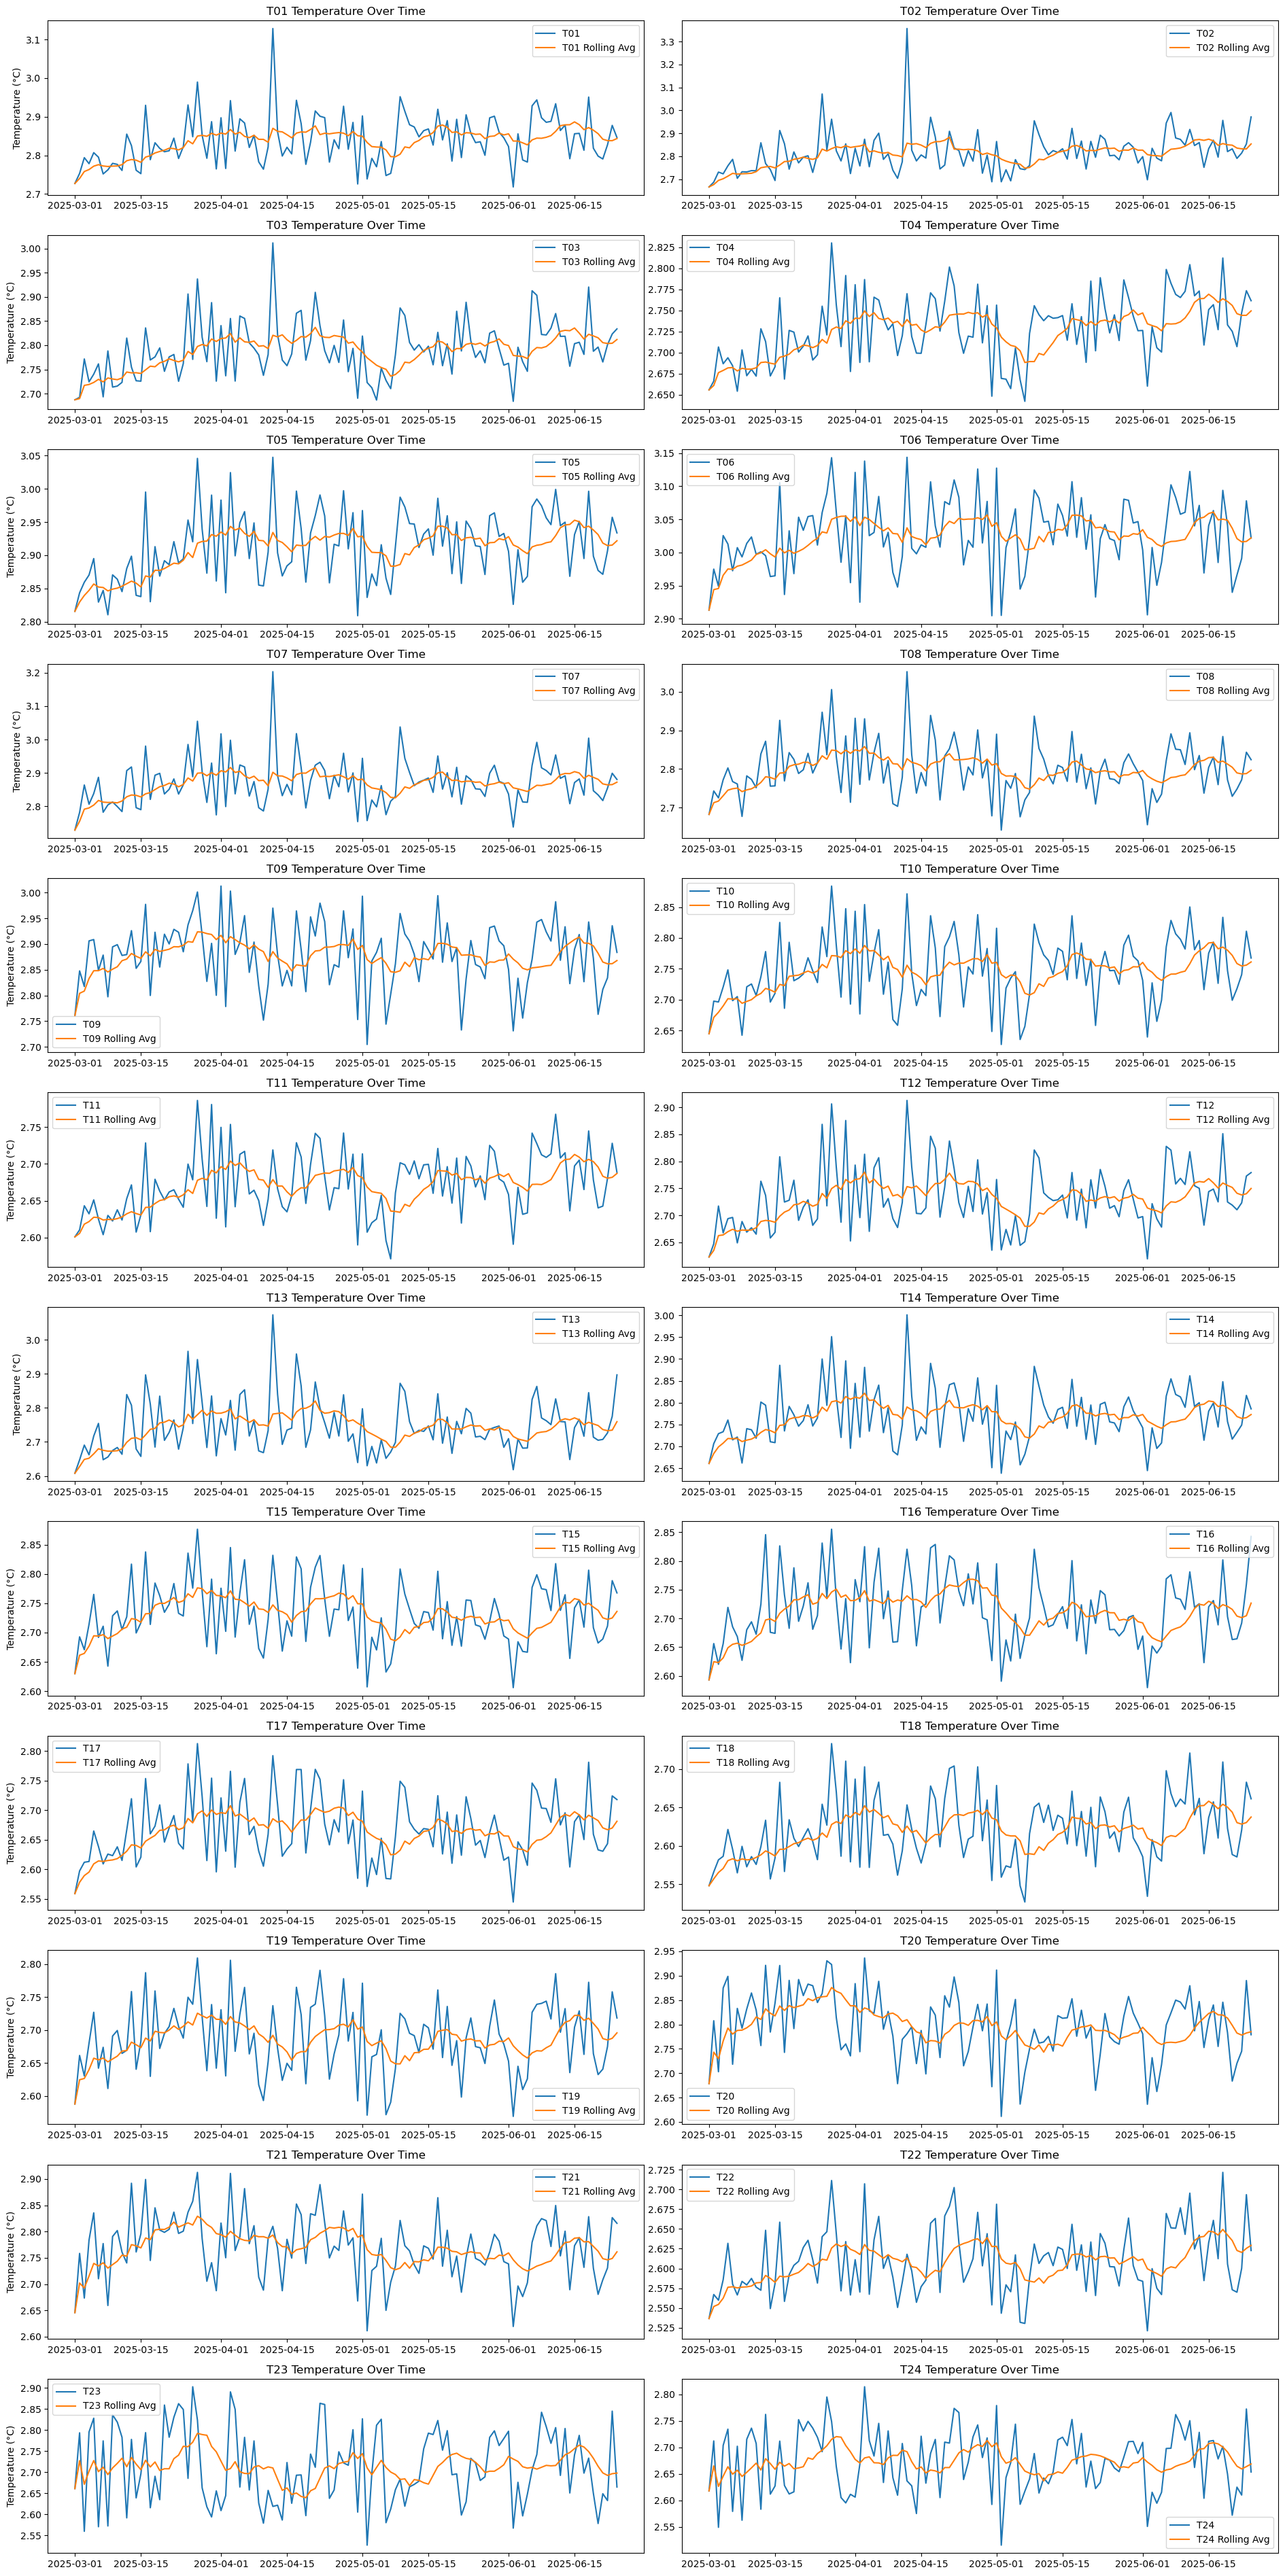

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(12, 2, figsize=(20, 38))

axs[0, 0].plot(df_tmpsf['t01'], label='T01')
axs[0, 0].plot(df_tmpsf['t01_rolling'], label='T01 Rolling Avg')
axs[0, 0].set_title("T01 Temperature Over Time")
axs[0, 0].legend()

axs[0, 1].plot(df_tmpsf['t02'], label='T02')
axs[0, 1].plot(df_tmpsf['t02_rolling'], label='T02 Rolling Avg')
axs[0, 1].set_title("T02 Temperature Over Time")
axs[0, 1].legend()

axs[1, 0].plot(df_tmpsf['t03'], label='T03')
axs[1, 0].plot(df_tmpsf['t03_rolling'], label='T03 Rolling Avg')
axs[1, 0].set_title("T03 Temperature Over Time")
axs[1, 0].legend()

axs[1, 1].plot(df_tmpsf['t04'], label='T04')
axs[1, 1].plot(df_tmpsf['t04_rolling'], label='T04 Rolling Avg')
axs[1, 1].set_title("T04 Temperature Over Time")
axs[1, 1].legend()

axs[2, 0].plot(df_tmpsf['t05'], label='T05')
axs[2, 0].plot(df_tmpsf['t05_rolling'], label='T05 Rolling Avg')
axs[2, 0].set_title("T05 Temperature Over Time")
axs[2, 0].legend()

axs[2, 1].plot(df_tmpsf['t06'], label='T06')
axs[2, 1].plot(df_tmpsf['t06_rolling'], label='T06 Rolling Avg')
axs[2, 1].set_title("T06 Temperature Over Time")
axs[2, 1].legend()

axs[3, 0].plot(df_tmpsf['t07'], label='T07')
axs[3, 0].plot(df_tmpsf['t07_rolling'], label='T07 Rolling Avg')
axs[3, 0].set_title("T07 Temperature Over Time")
axs[3, 0].legend()

axs[3, 1].plot(df_tmpsf['t08'], label='T08')
axs[3, 1].plot(df_tmpsf['t08_rolling'], label='T08 Rolling Avg')
axs[3, 1].set_title("T08 Temperature Over Time")
axs[3, 1].legend()

axs[4, 0].plot(df_tmpsf['t09'], label='T09')
axs[4, 0].plot(df_tmpsf['t09_rolling'], label='T09 Rolling Avg')
axs[4, 0].set_title("T09 Temperature Over Time")
axs[4, 0].legend()

axs[4, 1].plot(df_tmpsf['t10'], label='T10')
axs[4, 1].plot(df_tmpsf['t10_rolling'], label='T10 Rolling Avg')
axs[4, 1].set_title("T10 Temperature Over Time")
axs[4, 1].legend()

axs[5, 0].plot(df_tmpsf['t11'], label='T11')
axs[5, 0].plot(df_tmpsf['t11_rolling'], label='T11 Rolling Avg')
axs[5, 0].set_title("T11 Temperature Over Time")
axs[5, 0].legend()

axs[5, 1].plot(df_tmpsf['t12'], label='T12')
axs[5, 1].plot(df_tmpsf['t12_rolling'], label='T12 Rolling Avg')
axs[5, 1].set_title("T12 Temperature Over Time")
axs[5, 1].legend()

axs[6, 0].plot(df_tmpsf['t13'], label='T13')
axs[6, 0].plot(df_tmpsf['t13_rolling'], label='T13 Rolling Avg')
axs[6, 0].set_title("T13 Temperature Over Time")
axs[6, 0].legend()

axs[6, 1].plot(df_tmpsf['t14'], label='T14')
axs[6, 1].plot(df_tmpsf['t14_rolling'], label='T14 Rolling Avg')
axs[6, 1].set_title("T14 Temperature Over Time")
axs[6, 1].legend()

axs[7, 0].plot(df_tmpsf['t15'], label='T15')
axs[7, 0].plot(df_tmpsf['t15_rolling'], label='T15 Rolling Avg')
axs[7, 0].set_title("T15 Temperature Over Time")
axs[7, 0].legend()

axs[7, 1].plot(df_tmpsf['t16'], label='T16')
axs[7, 1].plot(df_tmpsf['t16_rolling'], label='T16 Rolling Avg')
axs[7, 1].set_title("T16 Temperature Over Time")
axs[7, 1].legend()

axs[8, 0].plot(df_tmpsf['t17'], label='T17')
axs[8, 0].plot(df_tmpsf['t17_rolling'], label='T17 Rolling Avg')
axs[8, 0].set_title("T17 Temperature Over Time")
axs[8, 0].legend()

axs[8, 1].plot(df_tmpsf['t18'], label='T18')
axs[8, 1].plot(df_tmpsf['t18_rolling'], label='T18 Rolling Avg')
axs[8, 1].set_title("T18 Temperature Over Time")
axs[8, 1].legend()

axs[9, 0].plot(df_tmpsf['t19'], label='T19')
axs[9, 0].plot(df_tmpsf['t19_rolling'], label='T19 Rolling Avg')
axs[9, 0].set_title("T19 Temperature Over Time")
axs[9, 0].legend()

axs[9, 1].plot(df_tmpsf['t20'], label='T20')
axs[9, 1].plot(df_tmpsf['t20_rolling'], label='T20 Rolling Avg')
axs[9, 1].set_title("T20 Temperature Over Time")
axs[9, 1].legend()

axs[10, 0].plot(df_tmpsf['t21'], label='T21')
axs[10, 0].plot(df_tmpsf['t21_rolling'], label='T21 Rolling Avg')
axs[10, 0].set_title("T21 Temperature Over Time")
axs[10, 0].legend()

axs[10, 1].plot(df_tmpsf['t22'], label='T22')
axs[10, 1].plot(df_tmpsf['t22_rolling'], label='T22 Rolling Avg')
axs[10, 1].set_title("T22 Temperature Over Time")
axs[10, 1].legend()

axs[11, 0].plot(df_tmpsf['t23'], label='T23')
axs[11, 0].plot(df_tmpsf['t23_rolling'], label='T23 Rolling Avg')
axs[11, 0].set_title("T23 Temperature Over Time")
axs[11, 0].legend()

axs[11, 1].plot(df_tmpsf['t24'], label='T24')
axs[11, 1].plot(df_tmpsf['t24_rolling'], label='T24 Rolling Avg')
axs[11, 1].set_title("T24 Temperature Over Time")
axs[11, 1].legend()
for i in range(12):
    axs[i, 0].set_ylabel('Temperature (°C)')
plt.savefig("thermistors_plot.png", dpi=300, bbox_inches='tight')
plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.show()



In [7]:
df_tmpsf_2023=df_tmpsf.loc['2025-03-01 00:00:00' : '2025-06-24 00:00:00']
df_tmpsf_2023.hvplot.line(y=['t09_rolling'], title= "TMPSF All March2025-June2025", ylabel = 'Temperature (°C)', xlabel = 'Month', frame_height=400, frame_width = 1000, fontsize = {'title': 15, 'ylabel': 15, 'ticks': 15},
                    legend='top')

:Curve   [index]   (t09_rolling)